##       INVESTMENT ANALYSIS

### Part 1 – Indexes Analysis:

#### Choosing four major Indexes Markets to determine which of them outperform best across multiple areas: volatility, returns, risk, and Sharpe ratios.

1.	S&P500 (GSPC). 
2.	NASDAQ Composite (IXIC). 
3.	S&P/ASX 200 (ASX). 
4.	DJCI (Dow Jones Commodity)
5.	CryptoCap(BTC-USD).


In [3]:
# Initial imports
import panel as pn
import requests
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from MCForecastTools import MCSimulation
import json
import yfinance as yf
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

### 1.	Prepare the Data: 

#### Collect Investments Data Using yfinance

In [5]:
# Get all data history of 3 years using yf funtion and "Close Price":
df = yf.download("^AXJO BTC-USD ^IXIC ^GSPC DJCI", start="2018-01-01", end="2021-02-28")
df.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                                  \
                 BTC-USD     DJCI        ^AXJO        ^GSPC        ^IXIC   
Date                                                                       
2017-12-31  14156.400391      NaN          NaN          NaN          NaN   
2018-01-01  13657.200195      NaN          NaN          NaN          NaN   
2018-01-02  14982.099609  16.1238  6061.299805  2695.810059  7006.899902   
2018-01-03  15201.000000  16.1401  6070.399902  2713.060059  7065.529785   
2018-01-04  15599.200195  16.1549  6077.100098  2723.989990  7077.910156   

                   Close                                                  ...  \
                 BTC-USD     DJCI        ^AXJO        ^GSPC        ^IXIC  ...   
Date                                                                      ...   
2017-12-31  14156.400391      NaN          NaN          NaN          NaN  ...   
2018-01-01  13657.200195      NaN          NaN          NaN          NaN  ...   
2018-01-02  14982.099609  16.1238  6061.299805  2695.810059  7006.899902  ...   
2018-01-03  15201.000000  16.1401  6070.399902  2713.060059  7065.529785  ...   
2018-01-04  15599.200195  16.1549  6077.100098  2723.989990  7077.910156  ...   

                    Open                                                  \
                 BTC-USD     DJCI        ^AXJO        ^GSPC        ^IXIC   
Date                                                                       
2017-12-31  12897.700195      NaN          NaN          NaN          NaN   
2018-01-01  14112.200195      NaN          NaN          NaN          NaN   
2018-01-02  13625.000000  16.1700  6065.100098  2683.729980  6937.649902   
2018-01-03  14978.200195  16.1250  6061.299805  2697.850098  7017.069824   
2018-01-04  15270.700195  16.1677  6070.399902  2719.310059  7089.500000   

                  Volume                                            
                 BTC-USD    DJCI ^AXJO         ^GSPC         ^IXIC  
Date                                                                
2017-12-31  1.213630e+10     NaN   NaN           NaN           NaN  
2018-01-01  1.029120e+10     NaN   NaN           NaN           NaN  
2018-01-02  1.684660e+10  6151.0   0.0  3.367250e+09  1.914930e+09  
2018-01-03  1.687190e+10  4381.0   0.0  3.538660e+09  2.166780e+09  
2018-01-04  2.178320e+10  3303.0   0.0  3.695260e+09  2.098890e+09  

[5 rows x 30 columns]

### Quantitative Analysis:

In [8]:
# Calculate Daily Returns
indexes_daily_return = df.pct_change()
indexes_daily_return.head()

Adj Close                                             Close  \
             BTC-USD      DJCI     ^AXJO     ^GSPC     ^IXIC   BTC-USD   
Date                                                                     
2017-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
2018-01-01 -0.035263       NaN       NaN       NaN       NaN -0.035263   
2018-01-02  0.097011       NaN       NaN       NaN       NaN  0.097011   
2018-01-03  0.014611  0.001011  0.001501  0.006399  0.008367  0.014611   
2018-01-04  0.026196  0.000917  0.001104  0.004029  0.001752  0.026196   

                                                    ...      Open            \
                DJCI     ^AXJO     ^GSPC     ^IXIC  ...   BTC-USD      DJCI   
Date                                                ...                       
2017-12-31       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2018-01-01       NaN       NaN       NaN       NaN  ...  0.094164       NaN   
2018-01-02       NaN       NaN       NaN       NaN  ... -0.034523       NaN   
2018-01-03  0.001011  0.001501  0.006399  0.008367  ...  0.099317 -0.002783   
2018-01-04  0.000917  0.001104  0.004029  0.001752  ...  0.019528  0.002648   

                                            Volume                            \
               ^AXJO     ^GSPC     ^IXIC   BTC-USD      DJCI ^AXJO     ^GSPC   
Date                                                                           
2017-12-31       NaN       NaN       NaN       NaN       NaN   NaN       NaN   
2018-01-01       NaN       NaN       NaN -0.152031       NaN   NaN       NaN   
2018-01-02       NaN       NaN       NaN  0.636991       NaN   NaN       NaN   
2018-01-03 -0.000627  0.005261  0.011448  0.001502 -0.287758   NaN  0.050905   
2018-01-04  0.001501  0.007954  0.010322  0.291093 -0.246063   NaN  0.044254   

                      
               ^IXIC  
Date                  
2017-12-31       NaN  
2018-01-01       NaN  
2018-01-02       NaN  
2018-01-03  0.131519  
2018-01-04 -0.031332  

[5 rows x 30 columns]

In [14]:
# plot daily returns


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [16]:
# Calculate and plot cumulative returns for all Indeces.

# Calculate cumulative returns of all Indeces
cumulative_returns = (1 + df).cumprod()
cumulative_returns

# Plot cumulative returns


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

### Risk Analysis:

In [9]:
# Calculate the standard deviation for each portfolio.
# Determine which portfolios are riskier 
daily_std_all_indeces = indexes_daily_return.std().sort_values(ascending = False)


In [10]:
# Calculate the Annualized Standard Deviation
annualized_std = daily_std_all_indeces * np.sqrt(252)


### Sharpe Ratios:

In [19]:
# Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
# Annualized Sharpe Ratios:
sharpe_ratios = (indexes_daily_return.mean() * 252) / (indexes_daily_return.std() * np.sqrt(252))
sharpe_ratios.sort_values()

Dow Jones Commodity   -0.269652
S&P/ASX 200            0.275010
S&P 500                0.601294
BTC                    0.789646
NASDAQ Composite       0.941736
dtype: float64

In [21]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.hvplot.bar(title='Sharpe Ratios of 5 Major World Indexes')

:Bars   [index]   (0)

## Part 2 - Retirement Plan Tool:

#### According to Indexes front part 1, select them to project their performance in 10-, 20- & 30-years using Monte Carlo simulations.

In [11]:
# Get all data history of 5 years using yf funtion and "Close Price":
portfolio_df = yf.download("^AXJO BTC-USD ^IXIC ^GSPC DJCI", start="2018-01-01", end="2020-11-30").dropna()
portfolio_df.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                                    \
                 BTC-USD       DJCI        ^AXJO        ^GSPC        ^IXIC   
Date                                                                         
2018-01-02  14982.099609  16.123800  6061.299805  2695.810059  7006.899902   
2018-01-03  15201.000000  16.140100  6070.399902  2713.060059  7065.529785   
2018-01-04  15599.200195  16.154900  6077.100098  2723.989990  7077.910156   
2018-01-05  17429.500000  16.018499  6122.299805  2743.149902  7136.560059   
2018-01-08  15170.099609  16.021999  6130.399902  2747.709961  7157.390137   

                   Close                                                    \
                 BTC-USD       DJCI        ^AXJO        ^GSPC        ^IXIC   
Date                                                                         
2018-01-02  14982.099609  16.123800  6061.299805  2695.810059  7006.899902   
2018-01-03  15201.000000  16.140100  6070.399902  2713.060059  7065.529785   
2018-01-04  15599.200195  16.154900  6077.100098  2723.989990  7077.910156   
2018-01-05  17429.500000  16.018499  6122.299805  2743.149902  7136.560059   
2018-01-08  15170.099609  16.021999  6130.399902  2747.709961  7157.390137   

            ...          Open                                       \
            ...       BTC-USD       DJCI        ^AXJO        ^GSPC   
Date        ...                                                      
2018-01-02  ...  13625.000000  16.170000  6065.100098  2683.729980   
2018-01-03  ...  14978.200195  16.125000  6061.299805  2697.850098   
2018-01-04  ...  15270.700195  16.167700  6070.399902  2719.310059   
2018-01-05  ...  15477.200195  16.090000  6077.100098  2731.330078   
2018-01-08  ...  16476.199219  16.016701  6122.299805  2742.669922   

                               Volume                               \
                  ^IXIC       BTC-USD     DJCI ^AXJO         ^GSPC   
Date                                                                 
2018-01-02  6937.649902  1.684660e+10   6151.0   0.0  3.367250e+09   
2018-01-03  7017.069824  1.687190e+10   4381.0   0.0  3.538660e+09   
2018-01-04  7089.500000  2.178320e+10   3303.0   0.0  3.695260e+09   
2018-01-05  7105.740234  2.384090e+10  27163.0   0.0  3.236620e+09   
2018-01-08  7135.379883  1.841390e+10   1623.0   0.0  3.242650e+09   

                          
                   ^IXIC  
Date                      
2018-01-02  1.914930e+09  
2018-01-03  2.166780e+09  
2018-01-04  2.098890e+09  
2018-01-05  2.020900e+09  
2018-01-08  2.051430e+09  

[5 rows x 30 columns]

In [12]:
# Get all data history of 5 years using yf funtion and "Close Price":
portfolio_df = yf.download("^AXJO BTC-USD ^IXIC ^GSPC DJCI", start="2018-01-01", end="2020-11-30").dropna()
portfolio_df = portfolio_df.swaplevel(axis=1)
portfolio_df = portfolio_df.rename(columns=str.lower)
portfolio_df.head()

[*********************100%***********************]  5 of 5 completed


,btc-usd,djci,^axjo,^gspc,^ixic,btc-usd,djci,^axjo,^gspc,^ixic,...,btc-usd,djci,^axjo,^gspc,^ixic,btc-usd,djci,^axjo,^gspc,^ixic
,adj close,adj close,adj close,adj close,adj close,close,close,close,close,close,...,open,open,open,open,open,volume,volume,volume,volume,volume
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,14982.099609,16.123800,6061.299805,2695.810059,7006.899902,14982.099609,16.123800,6061.299805,2695.810059,7006.899902,...,13625.000000,16.170000,6065.100098,2683.729980,6937.649902,1.684660e+10,6151.0,0.0,3.367250e+09,1.914930e+09
2018-01-03,15201.000000,16.140100,6070.399902,2713.060059,7065.529785,15201.000000,16.140100,6070.399902,2713.060059,7065.529785,...,14978.200195,16.125000,6061.299805,2697.850098,7017.069824,1.687190e+10,4381.0,0.0,3.538660e+09,2.166780e+09
2018-01-04,15599.200195,16.154900,6077.100098,2723.989990,7077.910156,15599.200195,16.154900,6077.100098,2723.989990,7077.910156,...,15270.700195,16.167700,6070.399902,2719.310059,7089.500000,2.178320e+10,3303.0,0.0,3.695260e+09,2.098890e+09
2018-01-05,17429.500000,16.018499,6122.299805,2743.149902,7136.560059,17429.500000,16.018499,6122.299805,2743.149902,7136.560059,...,15477.200195,16.090000,6077.100098,2731.330078,7105.740234,2.384090e+10,27163.0,0.0,3.236620e+09,2.020900e+09
2018-01-08,15170.099609,16.021999,6130.399902,2747.709961,7157.390137,15170.099609,16.021999,6130.399902,2747.709961,7157.390137,...,16476.199219,16.016701,6122.299805,2742.669922,7135.379883,1.841390e+10,1623.0,0.0,3.242650e+09,2.051430e+09


In [13]:
# Configuring a Monte Carlo simulation to forecast 10-, 20- & 30-years cumulative returns
MC_10years = MCSimulation(
    portfolio_data = portfolio_df,
    weights = [.20,.20,.20,.20,.20],
    num_simulation = 50,
    num_trading_days = 252*10)



In [14]:
# Running a Monte Carlo simulation to forecast 10-, 20- & 30-years cumulative returns

MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010803,0.993018,0.992405,0.994222,0.988611,1.018535,0.967928,1.005896,0.991179,0.993116,...,0.975554,0.999341,0.983967,1.010670,0.992668,0.983706,0.999521,1.008226,1.004432,0.997554
2,0.978439,0.969577,0.999270,0.998447,0.990049,1.003541,0.970941,1.006038,0.976213,0.984957,...,0.980322,1.002150,0.990713,1.017836,1.005238,0.984106,0.999749,1.022499,1.012833,1.011415
3,0.970254,0.986125,0.991097,1.005093,1.011660,0.988065,0.983316,1.016781,0.969753,0.989805,...,0.963395,1.004508,1.008686,1.013125,1.005964,0.970504,0.994852,1.028684,1.020592,1.006505
4,0.968775,0.982716,0.994292,0.999230,1.020455,0.987440,0.987258,1.012258,0.963406,0.982001,...,0.956746,0.996446,0.999512,1.024879,1.007462,0.983470,1.010454,1.015494,1.017923,1.000436
5,0.962340,0.980471,0.983398,1.008731,1.016492,1.008323,0.964294,1.025639,0.960399,0.980027,...,0.966724,0.996392,0.975771,1.005273,0.992104,0.992255,1.012053,1.009408,1.005102,1.000183
6,0.961314,0.983301,0.983561,1.037797,1.019300,0.994638,0.970940,1.032535,0.947767,1.013646,...,0.961735,0.991262,0.950992,0.990308,1.001924,0.991342,1.005289,1.000764,0.988015,1.002375
7,0.952772,0.974565,0.985391,1.037015,1.021706,0.985588,0.970662,1.036173,0.953777,1.018421,...,0.973355,0.992461,0.938602,0.973725,1.005320,0.997343,1.009120,0.997456,0.978266,0.985406
8,0.946390,0.986203,0.988095,1.037352,1.022839,0.981062,0.975791,1.050705,0.936984,1.014638,...,0.943299,1.004477,0.934090,0.958465,1.012271,0.988487,0.998500,1.011020,0.983219,0.985742
9,0.945334,0.989455,1.010987,1.029644,1.023341,0.986663,0.961245,1.071606,0.922483,1.025291,...,0.954302,1.005852,0.926498,0.961981,1.001483,1.001201,0.985926,1.014916,0.979005,0.996320


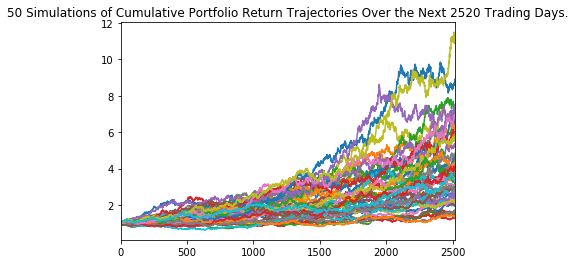

In [27]:
# Plot simulation outcomes 10 Years
MC_sim_10years = MC_10years.plot_simulation()
MC_sim_10years

In [16]:
# Plot simulation outcomes 20 Years


In [17]:
# Plot simulation outcomes 30 Years


### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results of 10 Years
MC_sum_sta10 = MC_10years.summarize_cumulative_return()
print(MC_sum_sta10)

count           50.000000
mean             4.122313
std              2.176370
min              1.291807
25%              2.475551
50%              3.704130
75%              5.638939
max             11.186129
95% CI Lower     1.393358
95% CI Upper     8.546726
Name: 2520, dtype: float64


In [19]:
# Fetch summary statistics from the Monte Carlo simulation results of 20 Years


In [20]:
# Fetch summary statistics from the Monte Carlo simulation results of 30 Years


#### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on an initial investment of 20,000 and every year of 10,000 or 20,000 during each period.

##### •	Fill up -> Initial investment 20,000.
##### •	Fill up or Select yearly Investment 10,000 or 15,000 or 20,000.
##### •	Print and Plot results of 10-, 20- & 30-years cumulative returns based on above selections.

In [33]:
# Compute summary statistics from the simulated daily returns 10 Years
simulated_returns_MC_10years = {
    "mean": list(MC_10years.simulated_return.mean(axis=1)),
    "median": list(MC_10years.simulated_return.median(axis=1)),
    "min": list(MC_10years.simulated_return.min(axis=1)),
    "max": list(MC_10years.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_MC_10years = pd.DataFrame(simulated_returns_MC_10years)

# Display sample data
df_simulated_returns_MC_10years.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.002792,1.001826,0.988801,1.021785
2,1.003656,1.003739,0.960617,1.033041
3,1.005112,1.006205,0.962153,1.044854
4,1.008791,1.008736,0.968012,1.063979


In [35]:
# Use the 'plot' function to create a chart
df_simulated_returns_MC_10years.hvplot(title="Simulated Statistics Returns of MC Over the Next 10 Year")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [21]:
# Compute summary statistics from the simulated daily returns 20 Years


In [22]:
# Use the 'plot' function to create a chart


In [23]:
# Compute summary statistics from the simulated daily returns 30 Years


In [24]:
# Use the 'plot' function to create a chart


In [40]:
from ipywidgets import widgets, interact
from IPython.display import display

# Create text widget for output
initial_investment = widgets.IntText()

# Define function to bind value of the input to the output variable 
def f(x):
    initial_investment.value = str(x)
    
# Create input slider with default value = 10    
interact(f, x=(10000,50000,10000))

initial_investment

interactive(children=(IntSlider(value=30000, description='x', max=50000, min=10000, step=10000), Output()), _d…

IntText(value=30000)

In [41]:
initial_investment.value

20000

In [46]:
# Calculate the final result based on above criterias
def calculating_final_value_based_on_annual_payments(years_projection,initial_investment,annual_investment):
    years_projection = int(years_projection)
    initial_investment = float(initial_investment)
    annual_investment = float(annual_investment)
    # This is capturing final value of initial investment
    if years_projection == 10:
        simulated_returns_df = df_simulated_returns_MC_10years
    elif years_projection == 20:
        simulated_returns_df = df_simulated_returns_MC_20years
    elif years_projection == 30:
        simulated_returns_df = df_simulated_returns_MC_30years
    total = initial_investment * simulated_returns_df['mean'].iloc[-1]
    for n in range(0,len(simulated_returns_df),252):
    # This is capturing final value of annual investment each year
        total += annual_investment * simulated_returns_df['mean'].iloc[-1]/simulated_returns_df.loc[n,'mean']
    # This reflects the total!
    return total

In [47]:
#Results :)
print(f'My Total Returs based on an initial invesment of ${initial_investment.value:,.2f}, annual investment of ${annual_investment.value:,.2f} and projection of {years_projection.value} years is ${calculating_final_value_based_on_annual_payments(years_projection.value,initial_investment.value,annual_investment.value):,.2f}')

My Total Returs based on an initial invesment of $20,000.00, annual investment of $10,000.00 and projection of 10 years is $331,797.28


## 